In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def drawPieMarker(xpos, ypos, dist, size, colors):

    ratios = np.array(dist)/ sum(dist)

    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy,
                        's':np.abs(xy).max()**2*size,'facecolor':color, 'edgecolor':'k'})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter([xpos], [ypos], alpha=0.8, **marker)

In [2]:
def PlotTardeOff(files):
    Colors = ['gray','red','green','lime','blue']
    Processes = ['LF','WTE','Composting','AD','SS_MRF']
    for f in files:
        df = pd.read_csv(f,index_col=0)
        dist = []
        for i in Processes:
            dist.append(df['Value'][i])
        drawPieMarker(xpos=df['Value']['Diversion'],
                      ypos=df['Value']['Total cost'],
                      dist=dist,
                      size=-df['Value']['GWP']*3,
                      colors=Colors)
    ax.scatter([], [], c='w', edgecolor='k' , alpha=1, s=300, label='Area: 100kgCO2e\noffset/Mg')
    ax.scatter([], [], c='gray', edgecolor='k' , alpha=1, s=100, label='LF', marker='s')
    ax.scatter([], [], c='red', edgecolor='k' , alpha=1, s=100, label='WTE', marker='s')
    ax.scatter([], [], c='green', edgecolor='k' , alpha=1, s=100, label='Composting', marker='s')
    ax.scatter([], [], c='lime', edgecolor='k' , alpha=1, s=100, label='AD', marker='s')
    ax.scatter([], [], c='blue', edgecolor='k' , alpha=1, s=100, label='SS_MRF\ \nReprocessing', marker='s')
    #ax.scatter([], [], c='navy', edgecolor='k' , alpha=1, s=100, label='Reprocessing', marker='s')
    ax.legend(scatterpoints=1, frameon=False, labelspacing=0.7, bbox_to_anchor=(0.98, 1), loc='upper left')

Text(-10, 100, 'E: Trade-offs')

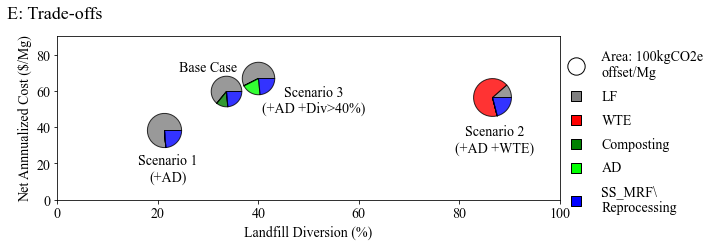

In [3]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"
fig, ax = plt.subplots(figsize=(9,3))
PlotTardeOff(['BaseCase.csv', 'OptimizeScenario1.csv', 'OptimizeScenario2.csv', 'OptimizeScenario3.csv'])
ax.set_xlim((0,100))
ax.set_ylim((0,90))
ax.set_xlabel('Landfill Diversion (%)')
ax.set_ylabel('Net Annnualized Cost ($/Mg)')
ax.text(30,73,'Base Case', horizontalalignment='center', verticalalignment='center')
ax.text(87,33,'Scenario 2\n(+AD +WTE)', horizontalalignment='center', verticalalignment='center')
ax.text(22,17,'Scenario 1\n(+AD)', horizontalalignment='center', verticalalignment='center')
ax.text(51,55,'Scenario 3\n(+AD +Div>40%)', horizontalalignment='center', verticalalignment='center')
ax.text(-10, 100 ,'E: Trade-offs', fontsize=18)

In [4]:
fig.savefig('TradeOff', dpi=600, bbox_inches='tight')